In [1]:
import sys
import os
import rootpath
sys.path.append(rootpath.detect())

import json
import matplotlib.pyplot as plt
import numpy as np
from testsuite.results import ResultsContainer

In [2]:
def load(p):
    return ResultsContainer(p)

In [3]:
def load_processed(w, verbose=False):
    w_str = "w{:.2f}".format(w).replace(".", "p")
    if verbose:
        print("w string: ", w_str)
        
    w_results_dir = os.path.join(
        rootpath.detect(),
        "/home/finley/phd/code/dsaf/experiments/w_comp/analysis/processing_scripts/dual_hypervolume_processing/processed_results/"+w_str+"/")
    
    assert os.path.isdir(w_results_dir)
    
    w_results_paths = sorted([os.path.join(w_results_dir, p) for p in os.listdir(w_results_dir)])
    for file in w_results_paths:
        assert os.path.isfile(file)
        w_results = {p.split("/")[-1].split(".")[0]: ResultsContainer(p) for p in w_results_paths}
    
    if verbose:
        for k in w_results.keys():
            print(k)
    return w_results

In [4]:
w0p05_results = load_processed(0.05)
w0p25_results = load_processed(0.25)
w0p50_results = load_processed(0.50)
w0p75_results = load_processed(0.75)
w0p95_results = load_processed(0.95)

In [78]:
key = "wfg5_2obj_6dim_3"
# stages = [10, 25, 50, 100, 150]
stages = np.arange(10, 105, 5)

def get_dual_hv_at_stages(rc, stages):
    return [int(np.where(i == np.asarray(rc.dual_hpv_hist_x))[0]) for i in stages]

In [79]:
r_w0p05 = w0p05_results[key]
r_w0p25 = w0p25_results[key]
r_w0p50 = w0p50_results[key]
r_w0p75 = w0p75_results[key]
r_w0p95 = w0p95_results[key]

seeds = np.arange(11)
inds = np.array([np.where(r_w0p50.seed == i)[0][0] for i in seeds])

In [80]:
y_w0p05 = r_w0p05.dual_hpv_history[0][:11,:len(stages)].mean(axis=0)
v_w0p05 = r_w0p05.dual_hpv_history[0][:11,:len(stages)].std(axis=0)
y_w0p25 = r_w0p25.dual_hpv_history[0][:11,:len(stages)].mean(axis=0)
v_w0p25 = r_w0p25.dual_hpv_history[0][:11,:len(stages)].std(axis=0)
y_w0p50 = r_w0p50.dual_hpv_history[0][inds,:len(stages)].mean(axis=0)
v_w0p50 = r_w0p50.dual_hpv_history[0][inds,:len(stages)].std(axis=0)
y_w0p75 = r_w0p75.dual_hpv_history[0][:11,:len(stages)].mean(axis=0)
v_w0p75 = r_w0p75.dual_hpv_history[0][:11,:len(stages)].std(axis=0)
y_w0p95 = r_w0p95.dual_hpv_history[0][:11,:len(stages)].mean(axis=0)
v_w0p95 = r_w0p95.dual_hpv_history[0][:11,:len(stages)].std(axis=0)

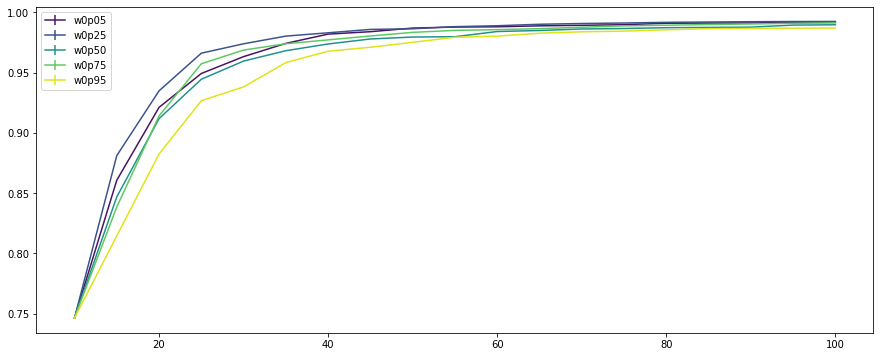

In [81]:
plt.figure(figsize=[15, 6])
col = plt.cm.viridis([0.05, 0.25, 0.5, 0.75, 0.95])
plt.errorbar(np.asarray(stages), y_w0p05, 0*v_w0p05,  label="w0p05", c=col[0])
plt.errorbar(np.asarray(stages), y_w0p25, 0*v_w0p25,  label="w0p25", c=col[1])
plt.errorbar(np.asarray(stages), y_w0p50, 0*v_w0p50,  label="w0p50", c=col[2])
plt.errorbar(np.asarray(stages), y_w0p75, 0*v_w0p75,  label="w0p75", c=col[3])
plt.errorbar(np.asarray(stages), y_w0p95, 0*v_w0p95,  label="w0p95", c=col[4])
plt.legend()